In [1]:
!mkdir data
!mkdir write

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘write’: File exists


In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.8 umap==0.5.2 numpy==1.19.5 scipy==1.5.4 pandas==1.1.5 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.9 louvain==0.7.1


In [4]:
results_file = 'write/ep15_p1scrnaseq.h5ad'  # the file that will store the analysis results

In [5]:
adata = sc.read_10x_mtx(
    '/mnt/c/Users/khoan/E16_P1_scRNAseq/run_count_E16IUEP1/outs/filtered_feature_bc_matrix/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache/mnt-c-Users-khoan-E16_P1_scRNAseq-run_count_E16IUEP1-outs-filtered_feature_bc_matrix-matrix.h5ad


In [6]:
adata.var_names_make_unique()

normalizing counts per cell
    finished (0:00:00)


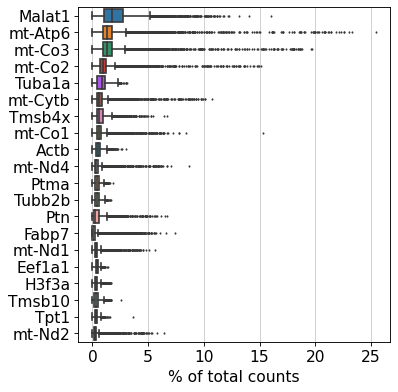

In [7]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [8]:
adata

AnnData object with n_obs × n_vars = 12419 × 32285
    var: 'gene_ids', 'feature_types'

In [9]:
cell_cycle_genes = [x.strip() for x in open('./regev_lab_cell_cycle_genes.txt')]

In [10]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

In [11]:
sc.pp.filter_cells(adata, min_genes=750) #get rid of cells with fewer than 750 genes
sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells

filtered out 323 cells that have less than 750 genes expressed
filtered out 13329 genes that are detected in less than 3 cells


In [12]:
adata.var

,gene_ids,feature_types,n_cells
Xkr4,ENSMUSG00000051951,Gene Expression,443
Gm19938,ENSMUSG00000102331,Gene Expression,1648
Rp1,ENSMUSG00000025900,Gene Expression,48
Sox17,ENSMUSG00000025902,Gene Expression,16
Mrpl15,ENSMUSG00000033845,Gene Expression,4712
...,...,...,...
Tmlhe,ENSMUSG00000079834,Gene Expression,117
4933409K07Rik,ENSMUSG00000095552,Gene Expression,40
Gm10931,ENSMUSG00000094350,Gene Expression,3
CAAA01147332.1,ENSMUSG00000095742,Gene Expression,17


In [13]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [14]:
adata.var[adata.var.mt ==True] # it is possible your gtf file did not annotate MT genes with MT-, good to check here

,gene_ids,feature_types,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
mt-Nd1,ENSMUSG00000064341,Gene Expression,12039,True,12039,23.171297,0.471230,280280.0
mt-Nd2,ENSMUSG00000064345,Gene Expression,12035,True,12035,18.354828,0.504299,222020.0
mt-Co1,ENSMUSG00000064351,Gene Expression,12079,True,12079,39.888725,0.140542,482494.0
mt-Co2,ENSMUSG00000064354,Gene Expression,12094,True,12094,65.378967,0.016534,790824.0
mt-Atp8,ENSMUSG00000064356,Gene Expression,3724,True,3724,0.394759,69.212963,4775.0
mt-Atp6,ENSMUSG00000064357,Gene Expression,12096,True,12096,95.739334,0.000000,1158063.0
mt-Co3,ENSMUSG00000064358,Gene Expression,12094,True,12094,91.974541,0.016534,1112524.0
mt-Nd3,ENSMUSG00000064360,Gene Expression,11406,True,11406,5.253803,5.704365,63550.0
mt-Nd4l,ENSMUSG00000065947,Gene Expression,10394,True,10394,2.927414,14.070767,35410.0
mt-Nd4,ENSMUSG00000064363,Gene Expression,12063,True,12063,25.926670,0.272817,313609.0


In [15]:
adata

AnnData object with n_obs × n_vars = 12096 × 18956
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

... storing 'feature_types' as categorical


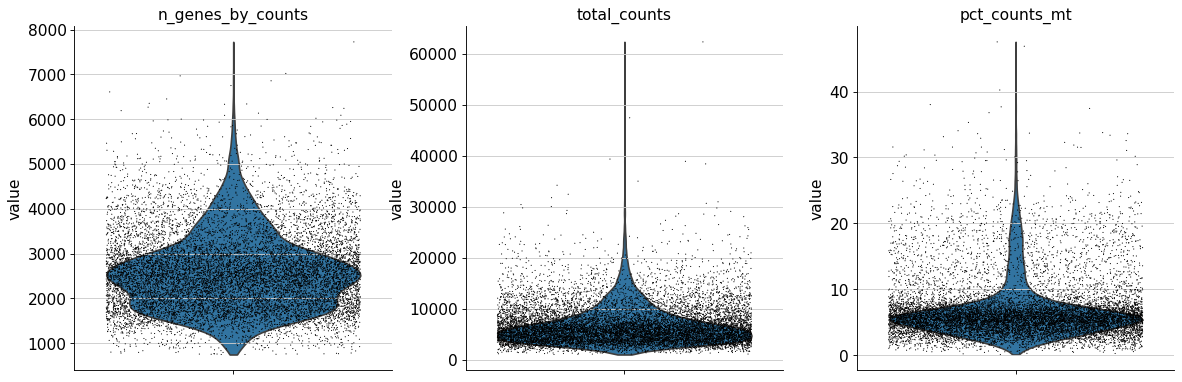

In [16]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

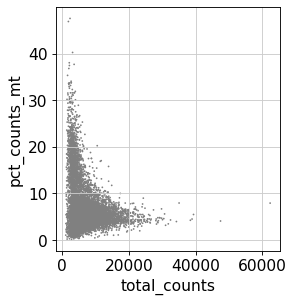

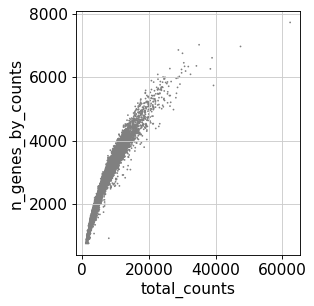

In [17]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [18]:
adata

AnnData object with n_obs × n_vars = 12096 × 18956
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [19]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCCAAGCGAGTCA-1,2398,2398,6155.0,275.0,4.467912
AAACCCAAGGGATCGT-1,2628,2628,5740.0,129.0,2.247387
AAACCCACAATGCTCA-1,1967,1966,4011.0,560.0,13.961606
AAACCCACACATGGTT-1,4045,4044,13625.0,562.0,4.124771
AAACCCACAGTAACAA-1,3289,3289,10272.0,775.0,7.544782
...,...,...,...,...,...
TTTGTTGTCAACCCGG-1,1622,1622,3554.0,226.0,6.359032
TTTGTTGTCCATCAGA-1,3260,3259,9093.0,513.0,5.641703
TTTGTTGTCGCTGACG-1,1781,1781,3826.0,276.0,7.213800
TTTGTTGTCTATTCGT-1,2013,2013,5475.0,761.0,13.899544


In [19]:
adata[adata.obs.index == ''] # if you wanted to filter certain cells

View of AnnData object with n_obs × n_vars = 0 × 18956
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [20]:
adata = adata[adata.obs.n_genes_by_counts < 4400, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

In [21]:
adata.X

<10039x18956 sparse matrix of type '<class 'numpy.float32'>'
	with 26084757 stored elements in Compressed Sparse Row format>

In [22]:
adata.X[0,:]

<1x18956 sparse matrix of type '<class 'numpy.float32'>'
	with 2398 stored elements in Compressed Sparse Row format>

In [23]:
adata.X[0,:].sum()

6155.0

In [24]:
adata.X[1,:].sum()

5740.0

In [25]:
sc.pp.normalize_total(adata, target_sum=1e4) #normalize every cell to 10,000 UMI

/home/kendyhoang/anaconda3/envs/celloracle_env/lib/python3.6/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)


In [26]:
adata.X[0,:].sum()

9999.992

In [27]:
adata.X[1,:].sum()

10000.097

In [28]:
sc.pp.log1p(adata) #change to log counts

In [29]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) #these are default values

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [30]:
adata.var

,gene_ids,feature_types,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
Xkr4,ENSMUSG00000051951,Gene Expression,443,False,443,0.039931,96.337632,483.0,False,0.052858,0.799009,0.372258
Gm19938,ENSMUSG00000102331,Gene Expression,1648,False,1648,0.168485,86.375661,2038.0,True,0.206947,0.968793,0.884770
Rp1,ENSMUSG00000025900,Gene Expression,48,False,48,0.004134,99.603175,50.0,False,0.004016,0.248679,-1.288969
Sox17,ENSMUSG00000025902,Gene Expression,16,False,16,0.003555,99.867725,43.0,False,0.002230,1.244884,1.718179
Mrpl15,ENSMUSG00000033845,Gene Expression,4712,False,4712,0.549190,61.044974,6643.0,False,0.593332,0.566264,-0.632422
...,...,...,...,...,...,...,...,...,...,...,...,...
Tmlhe,ENSMUSG00000079834,Gene Expression,117,False,117,0.009838,99.032738,119.0,False,0.012702,0.381146,-0.889105
4933409K07Rik,ENSMUSG00000095552,Gene Expression,40,False,40,0.003307,99.669312,40.0,False,0.004831,0.553581,-0.368592
Gm10931,ENSMUSG00000094350,Gene Expression,3,False,3,0.000248,99.975198,3.0,False,0.000513,0.661085,-0.044080
CAAA01147332.1,ENSMUSG00000095742,Gene Expression,17,False,17,0.001405,99.859458,17.0,False,0.002577,0.755270,0.240229


In [31]:
adata.var[adata.var.highly_variable] # check how many highly variable genes there are

,gene_ids,feature_types,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
Gm19938,ENSMUSG00000102331,Gene Expression,1648,False,1648,0.168485,86.375661,2038.0,True,0.206947,0.968793,0.884770
Rgs20,ENSMUSG00000002459,Gene Expression,1493,False,1493,0.188575,87.657077,2281.0,True,0.241901,0.969796,0.887797
St18,ENSMUSG00000033740,Gene Expression,428,False,428,0.048198,96.461640,583.0,True,0.076824,0.992862,0.957423
Adhfe1,ENSMUSG00000025911,Gene Expression,773,False,773,0.088459,93.609458,1070.0,True,0.118265,0.861551,0.561047
Vxn,ENSMUSG00000067879,Gene Expression,986,False,986,0.126323,91.848545,1528.0,True,0.185004,1.225081,1.658400
...,...,...,...,...,...,...,...,...,...,...,...,...
Dcx,ENSMUSG00000031285,Gene Expression,8940,False,8940,2.874669,26.091270,34772.0,True,1.780819,1.554405,0.760637
A230072E10Rik,ENSMUSG00000084771,Gene Expression,178,False,178,0.015212,98.528439,184.0,True,0.026984,0.905777,0.694548
Sat1,ENSMUSG00000025283,Gene Expression,2305,False,2305,0.360698,80.944114,4363.0,True,0.421789,1.309720,2.070786
Glra2,ENSMUSG00000018589,Gene Expression,1307,False,1307,0.143849,89.194775,1740.0,True,0.155104,0.865151,0.571915


In [32]:
adata.raw = adata #save raw data before processing values and further filtering

In [33]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    596 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    643 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
... storing 'phase' as categorical


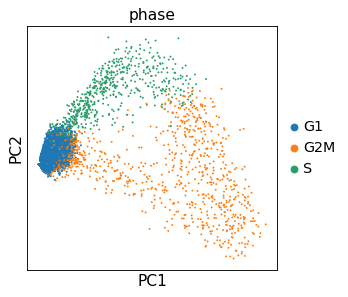

In [34]:
adata_cc_genes = adata[:, cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

In [35]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']) 
#Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed
#Regress out effects of cell cycle genes

regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use
... storing 'phase' as categorical
    finished (0:02:13)


In [36]:
sc.pp.scale(adata, max_value=10) #scale each gene to unit variance

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


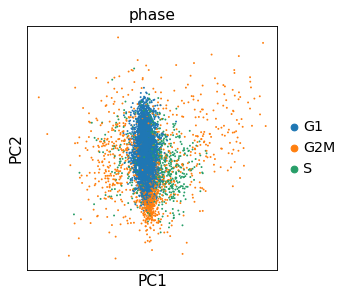

In [37]:
adata_cc_genes = adata[:, cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

In [38]:
adata = adata[:, adata.var.highly_variable] #filter highly variable

In [39]:
adata.X.min()

ArrayView(-10.1185465, dtype=float32)

In [40]:
adata.raw.X.min()

0.0

In [41]:
adata

View of AnnData object with n_obs × n_vars = 10039 × 1623
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [42]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


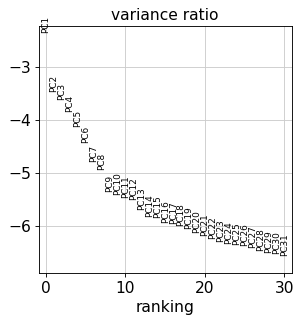

In [43]:
sc.pl.pca_variance_ratio(adata, log=True)

In [44]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)


In [45]:
sc.tl.tsne(adata)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:15)


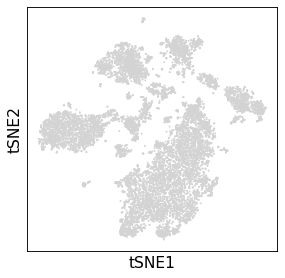

In [46]:
sc.pl.tsne(adata)

running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


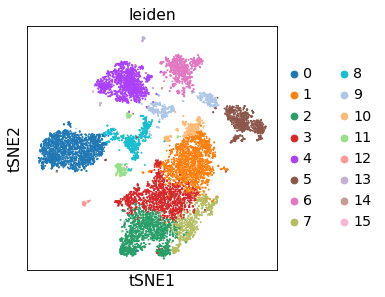

In [47]:
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.tsne(adata, color=['leiden'])

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:16)


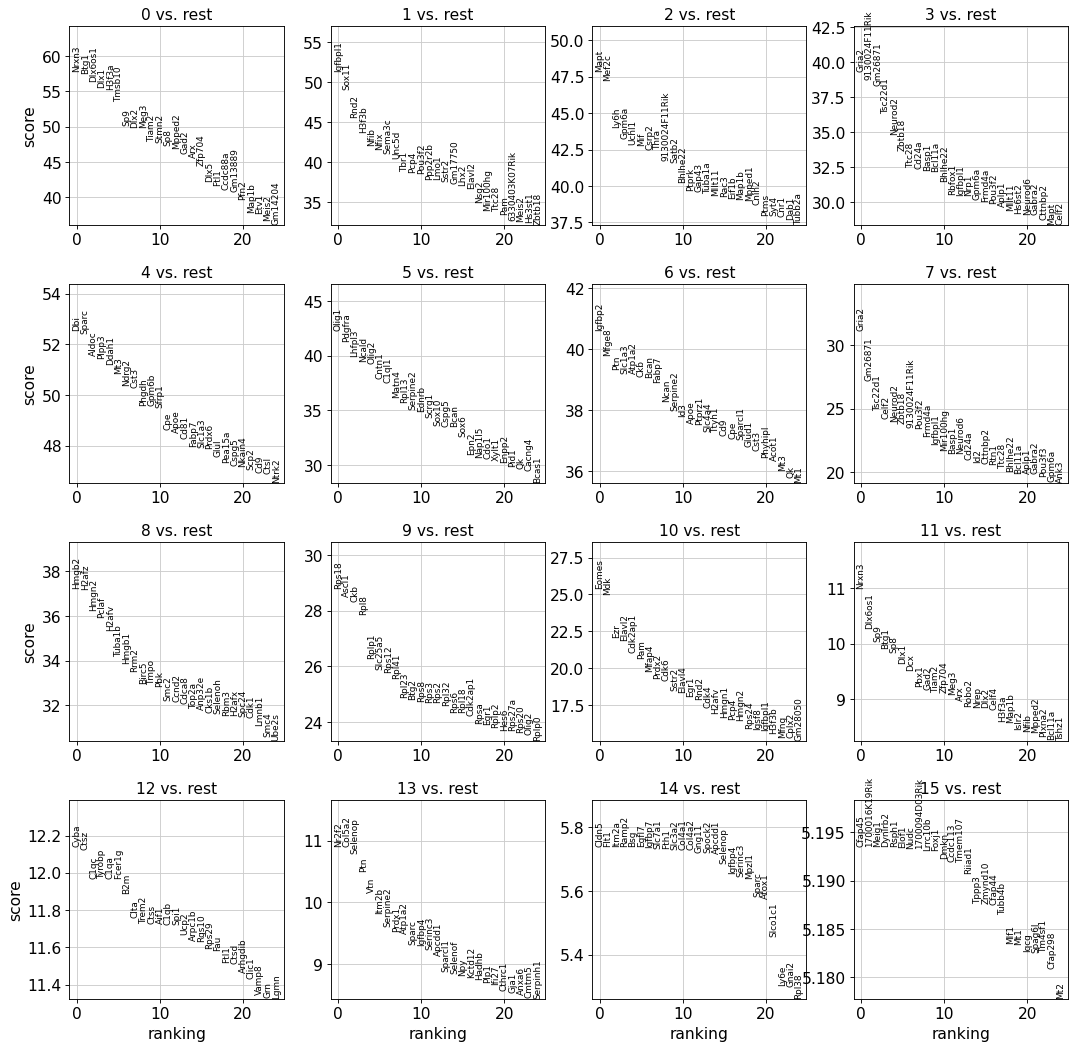

In [48]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [49]:
adata.uns

OverloadedDict, wrapping:
	OrderedDict([('log1p', {'base': None}), ('hvg', {'flavor': 'seurat'}), ('pca', {'params': {'zero_center': True, 'use_highly_variable': True}, 'variance': array([145.00368  ,  47.135284 ,  40.98323  ,  32.391064 ,  24.439646 ,
        17.9571   ,  12.509454 ,  10.857796 ,   7.20672  ,   6.764382 ,
         6.346758 ,   6.1120462,   5.071433 ,   4.454377 ,   4.338153 ,
         4.000468 ,   3.9034271,   3.7473001,   3.5846252,   3.3125503,
         3.1409895,   2.9332948,   2.7656412,   2.6960716,   2.6030643,
         2.5814357,   2.4638064,   2.348786 ,   2.267816 ,   2.1961255,
         2.1447926,   2.1123168,   2.0716145,   2.0172632,   1.9850435,
         1.9594401,   1.9116846,   1.8470311,   1.8295186,   1.8209077,
         1.808814 ,   1.7864628,   1.7547764,   1.748494 ,   1.7187201,
         1.6914386,   1.6792032,   1.6678362,   1.6499397,   1.6473696],
      dtype=float32), 'variance_ratio': array([0.09562116, 0.03108287, 0.02702596, 0.02135995, 0.0

In [51]:
adata.uns['rank_genes_groups'] #data output from rank genes

{'params': {'groupby': 'leiden',
  'reference': 'rest',
  'method': 'wilcoxon',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('Nrxn3', 'Igfbpl1', 'Mapt', 'Gria2', 'Dbi', 'Olig1', 'Igfbp2', 'Gria2', 'Hmgb2', 'Rps18', 'Eomes', 'Nrxn3', 'Cyba', 'Nr2f2', 'Cldn5', 'Cfap45'),
            ('Btg1', 'Sox11', 'Mef2c', '9130024F11Rik', 'Sparc', 'Pdgfra', 'Mfge8', 'Gm26871', 'H2afz', 'Ascl1', 'Mdk', 'Dlx6os1', 'Ctsz', 'Col5a2', 'Flt1', '1700016K19Rik'),
            ('Dlx6os1', 'Rnd2', 'Ly6h', 'Gm26871', 'Aldoc', 'Lhfpl3', 'Ptn', 'Tsc22d1', 'Hmgn2', 'Ckb', 'Ezr', 'Sp9', 'C1qc', 'Selenop', 'Itm2a', 'Meig1'),
            ...,
            ('Pantr1', 'Cspg5', 'Ccnd2', 'Marcks', 'Tubb5', 'Stmn1', 'Tmsb10', 'mt-Nd1', 'Ppp2r2b', 'Gria2', 'Stmn2', 'Rps20', 'Rtn1', 'Tubb2b', 'Rtn1', 'Tmsb4x'),
            ('Lhx2', 'Sox2', 'H2afv', 'Sox2', 'Hnrnpa1', 'Gm17750', 'Sox4', 'mt-Co3', 'Rtn1', 'Tubb2b', 'Ncam1', 'Rpl41', 'Tuba1a', 'Meis2', 'Marcksl1', 'Marcksl1'),

In [52]:
adata.uns['rank_genes_groups']['names']['0'] #genes for cluster 0

array(['Nrxn3', 'Btg1', 'Dlx6os1', ..., 'Pantr1', 'Lhx2', 'Ptn'],
      dtype=object)

In [54]:
results = adata.uns['rank_genes_groups']

In [56]:
results['names']['0']

array(['Nrxn3', 'Btg1', 'Dlx6os1', ..., 'Pantr1', 'Lhx2', 'Ptn'],
      dtype=object)

In [57]:
results['names'].dtype.names

('0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15')

In [58]:
out = np.array([[0,0,0,0,0]]) #5 column array
for group in results['names'].dtype.names:
    out = np.vstack((out, np.vstack((results['names'][group],
                                     results['scores'][group],
                                     results['pvals_adj'][group],
                                     results['logfoldchanges'][group],
                                     np.array([group] * len(results['names'][group])).astype('object'))).T))



In [59]:
out.shape

(303297, 5)

In [60]:
markers = pd.DataFrame(out[1:], columns = ['Gene', 'scores', 'pval_adj', 'lfc', 'cluster'])

In [61]:
markers

,Gene,scores,pval_adj,lfc,cluster
0,Nrxn3,57.7984,0,5.16688,0
1,Btg1,57.5372,0,3.27018,0
2,Dlx6os1,56.4217,0,5.86912,0
3,Dlx1,55.568,0,5.25529,0
4,H3f3a,55.285,0,1.27995,0
...,...,...,...,...,...
303291,Rtn1,-4.47934,0.00116337,-2.01631,15
303292,Sox4,-4.51214,0.00104876,-3.57924,15
303293,Tmsb4x,-4.63048,0.000860787,-2.77988,15
303294,Marcksl1,-4.6684,0.000788256,-2.53217,15


In [62]:
markers = markers[(markers.pval_adj < 0.05) & (abs(markers.lfc) > 1)]

In [63]:
markers

,Gene,scores,pval_adj,lfc,cluster
0,Nrxn3,57.7984,0,5.16688,0
1,Btg1,57.5372,0,3.27018,0
2,Dlx6os1,56.4217,0,5.86912,0
3,Dlx1,55.568,0,5.25529,0
4,H3f3a,55.285,0,1.27995,0
...,...,...,...,...,...
303291,Rtn1,-4.47934,0.00116337,-2.01631,15
303292,Sox4,-4.51214,0.00104876,-3.57924,15
303293,Tmsb4x,-4.63048,0.000860787,-2.77988,15
303294,Marcksl1,-4.6684,0.000788256,-2.53217,15


In [64]:
markers[markers.cluster == '0'] #look at marker genes for specific clusters - cluster 0 here

,Gene,scores,pval_adj,lfc,cluster
0,Nrxn3,57.7984,0,5.16688,0
1,Btg1,57.5372,0,3.27018,0
2,Dlx6os1,56.4217,0,5.86912,0
3,Dlx1,55.568,0,5.25529,0
4,H3f3a,55.285,0,1.27995,0
...,...,...,...,...,...
18951,Ppp2r2b,-40.8237,0,-5.10965,0
18952,Itm2b,-42.7655,0,-2.61735,0
18953,Pantr1,-44.3407,0,-1.87107,0
18954,Lhx2,-44.3521,0,-4.45345,0


In [70]:
markers.to_csv('/write/leiden_markers.csv')

In [88]:
adata.write("scvelo.h5ad")